## EDA

In [ ]:
import pandas as pd

data = pd.read_pickle('dane/done/tweets_cutoff.pkl')
openai_results = data['openai_results'].to_list()
len(openai_results)

In [ ]:
import ast

for i in range(len(openai_results)):
    result = openai_results[i]
    result = result.replace('\n', '')
    try:
        openai_results[i] = ast.literal_eval(result)

    except Exception as e:
            print(f"An error occurred: {e}")
            print(i)
            print(openai_results[i])

In [ ]:
result_list = []

for i, row in data_more.reset_index().iterrows():
    
    if isinstance(openai_results[i], list):
        results = openai_results[i]
    else:
        results = [openai_results[i]]
    for result in results:
        if isinstance(result, dict) and bool(result):
            new_data = {'tweet_id' : row['tweet_id'],
                    'username' : row['username'],
                    'date' : row['date'],
                    'text_all': row['text'],
                    'text': result['text'], 
                    'topic' : result['topic'], 
                    'sentiment' : result['sentiment']
                    }
            result_list.append(new_data)

df = pd.DataFrame(result_list)

In [1058]:
pd.set_option('display.max_colwidth', None)

df[['text', 'topic','sentiment']]

,text,topic,sentiment
0,wiadomość prosto od mera kijowa vitaliy_klychko starsze pociągi metra warszawskiego od wczoraj wożą pasażerów w stolicy ukrainy łącznie przekazaliśmy 60 w pełni sprawnych technicznie wagonów z serii 81 które w warszawa były wycofywane z codziennego użytku wraz z pojawianiem się nowych składów teraz będą dużym wsparciem dla tamtejszej kolei podziemnej niech dobrze służą naszym przyjaciołom z ukrainy 🇵🇱🇺🇦 standwithukraine samorządydlaukrainy,ukraina,positive
1,pis jest znany z przecinania wstęgi po kilka razy więc i pan minister gróbarczyk nie zawiódł,rząd,neutral
2,meldunek od serca,inflacja,neutral
3,drastyczny wzrost ceny hurtowej oleju napędowego i benzyny,inflacja,negative
4,15 października pan obajtek z ekipą zapewne odkłada kasę na prawników i odszkodowania,sądownictwo,negative
...,...,...,...
1217,mnie mimo wszystko śmieszy ten zbieg okoliczności aczkolwiek nie zdziwię się jeśli roman giertych napisze że akcja krzysztofa stanowskiego to pisowska operacja niszczenia fenomenalnej kampanii po janoszek,polityka,positive
1218,czołowi politycy po w warszawie przebywają decyzjami sądów w areszcie w związku z zarzutami korupcyjnymi,korupcja,negative
1219,donald tusk tyle mówi o mafiach może mu o kolegów swoich chodzi dlatego chcą zlikwidować cba,korupcja,negative
1220,słynny handlarz roszczeniami marek m skazany na 25 roku więzienia za przekręt w ramach afery reprywatyzacyjnej,reprywatyzacja,negative


In [ ]:
df.to_pickle('dane/done/tweets_fragments_final.pkl')

In [1046]:
df = pd.read_pickle('dane/done/tweets_fragments_final.pkl')

In [1047]:
len(df)

5312

### tematy

In [1048]:
print(f"Ilość tematów przed wyczyszczeniem: {len(df['topic'].unique())}")
print(df['topic'].unique())

Ilość tematów przed wyczyszczeniem: 672
['Ukraina' 'rząd' 'Inflacja' 'sądownictwo' 'TVP' 'polityka' 'relokacja'
 'neutral' 'prawa kobiet' 'podziękowanie' 'marihuana' 'wybory'
 'transport publiczny' 'None' 'sport' 'patriotyzm' 'kampania wyborcza'
 'Polityka' 'Nieokreślony' 'Patriotyzm' 'prawa wyborcze' 'pojednanie'
 'NFZ' 'publiczna opieka zdrowotna' 'jedność' 'spotkanie' 'wośp' 'aborcja'
 'lgbt' '500plus' 'unknown' 'edukacja seksualna' 'politics' 'przesądy'
 'Kościół' 'węgiel' 'unspecified' 'policja' 'PFR' 'wdzięczność'
 'undefined' 'Stany Zjednoczone' 'CBOS' 'frekwencja wyborcza' 'Inne'
 'zdrowie' 'równość płac' 'reklama kampanii' 'Czas' 'społeczeństwo'
 'ekologia' 'Covid' 'trójmiasto' 'Inwestycje drogowe' 'feminizm'
 'telekomunikacja' 'Społeczeństwo' 'Nieznany' 'miejsce' 'kraj' 'telefon'
 'bezpieczeństwo' 'świeckie państwo' 'wojsko' 'Emerytura' 'Imigranci'
 'polityka zagraniczna' 'przemoc' 'solidarność' 'personal' 'rekomendacja'
 'nierówność majątkowa' 'wspólnota' 'polityczne' 'prawa

In [1049]:
df['topic'] = df['topic'].str.lower()

df['topic'] = df['topic'].replace({'nieokreślony': pd.NA, 
                                    'undefined': pd.NA,
                                    'unknown': pd.NA,
                                    'none': pd.NA,
                                    'null': pd.NA,
                                    'neutral': pd.NA,
                                    'inne': pd.NA,
                                    'topic': pd.NA})


df = df[~df['topic'].isna()]

In [1050]:
print(f"Ilość tematów po wyczyszczeniu: {len(df['topic'].unique())}")
print(df['topic'].unique())

Ilość tematów po wyczyszczeniu: 580
['ukraina' 'rząd' 'inflacja' 'sądownictwo' 'tvp' 'polityka' 'relokacja'
 'prawa kobiet' 'podziękowanie' 'marihuana' 'wybory' 'transport publiczny'
 'sport' 'patriotyzm' 'kampania wyborcza' 'prawa wyborcze' 'pojednanie'
 'nfz' 'publiczna opieka zdrowotna' 'jedność' 'spotkanie' 'wośp' 'aborcja'
 'lgbt' '500plus' 'edukacja seksualna' 'politics' 'przesądy' 'kościół'
 'węgiel' 'unspecified' 'policja' 'pfr' 'wdzięczność' 'stany zjednoczone'
 'cbos' 'frekwencja wyborcza' 'zdrowie' 'równość płac' 'reklama kampanii'
 'czas' 'społeczeństwo' 'ekologia' 'covid' 'trójmiasto'
 'inwestycje drogowe' 'feminizm' 'telekomunikacja' 'nieznany' 'miejsce'
 'kraj' 'telefon' 'bezpieczeństwo' 'świeckie państwo' 'wojsko' 'emerytura'
 'imigranci' 'polityka zagraniczna' 'przemoc' 'solidarność' 'personal'
 'rekomendacja' 'nierówność majątkowa' 'wspólnota' 'polityczne'
 'prawa zwierząt' 'prawo karne' 'brak tematu' 'telewizja publiczna'
 'politycy' 'media' 'płot' 'poland' 'zwierzęt

In [1051]:
topic_counts = df.groupby(by='topic').size().reset_index(name='topic_count')


topic_counts.sort_values(by='topic_count', ascending=False).head(10)

,topic,topic_count
468,sądownictwo,421
287,polityka,325
393,relokacja,205
368,publiczna opieka zdrowotna,201
502,unia europejska,197
105,inflacja,197
317,prawa kobiet,170
518,wojsko,142
91,granica polsko-białoruska,141
418,rząd,126


In [1052]:
topic_counts = df.groupby(by='topic').size().reset_index(name='topic_count')

topic_counts_top100 = topic_counts.sort_values(by='topic_count', ascending=False).head(100)
topic_counts_top100

,topic,topic_count
468,sądownictwo,421
287,polityka,325
393,relokacja,205
368,publiczna opieka zdrowotna,201
502,unia europejska,197
...,...,...
201,nato,6
267,po,6
291,polityka obronna,6
327,prawica,5


In [1053]:
import plotly.express as px


fig = px.bar(topic_counts_top100, x='topic', y='topic_count', labels={'topic_count': 'Count'}, title='Topic Counts Histogram')

# Show the plot
fig.show()

### sentyment

In [1054]:
df['sentiment'].unique()

array(['positive', 'neutral', 'Neutral', 'negative', 'neutralny',
       'pozytywny', 'negatywny', 'Positive', 'Negative', 'unknown', 'N/A',
       'Pozytywny', '', 'Neutralny', 'none'], dtype=object)

In [1055]:
df['sentiment'] = df['sentiment'].str.lower()

df['sentiment'] = df['sentiment'].replace({'pozytywny': 'positive', 
                                           'negatywny': 'negative', 
                                           'neutralny': 'neutral',
                                           'none': 'neutral',
                                           'n/a': 'neutral',
                                           'null': 'neutral',
                                           'undefined': 'unknown',
                                           'sentiment': 'unknown',
                                           '': 'unknown'})
df['sentiment'].unique()

array(['positive', 'neutral', 'negative', 'unknown'], dtype=object)

In [1056]:
df.groupby(by='sentiment').count()

,tweet_id,username,date,text_all,text,topic
sentiment,,,,,,
negative,1679,1679,1679,1679,1679,1679
neutral,1713,1713,1713,1713,1713,1713
positive,1715,1715,1715,1715,1715,1715
unknown,18,18,18,18,18,18


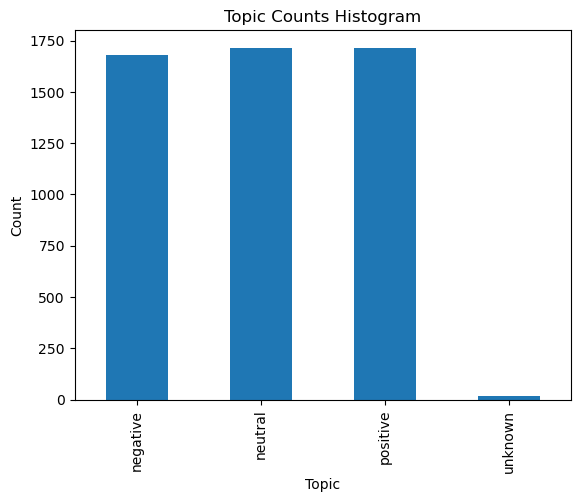

In [1057]:
import matplotlib.pyplot as plt


sentiment_counts = df.groupby(by='sentiment').size().reset_index(name='sentiment_count')

# Plotting the histogram
sentiment_counts.plot(kind='bar', x='sentiment', y='sentiment_count', legend=False)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Counts Histogram')
plt.show()